> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project1: Investigate the Movie Dataset and provide insight you observe

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Questions to answer
- which particular year has the highest movies released and from which director
- Release year with highest profit
- what movie generated highest profit
- Does the popularity affects the revenue generated?
- Does the budget allocation affect the revenue generated?

#### Checking dataset properties 

In [34]:
df = pd.read_csv('C:\\Users\\USER\\Desktop\\ALX-T\\tmdb-movies.csv')


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

checking the information of the dataset to know how to clean and wrangle the data

In [36]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


# Data Cleaning

- check for duplicates
- check for missing data and rows(row in director)
- change release date to datetime and other incorrect data types
- drop imcomplete rows or columns in id, imdb_id, homepage, tagline,keywords, overview

In [37]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [38]:
def drop_column_row(df, column_row, axis):
    df.drop(column_row, axis=axis, inplace=True)  

In [39]:
#dropping columns that are not important to my analysis, therefore dropping them are the best 
#creating the columns as a list to make it easy to drop at once 
columns = ['id', 'imdb_id', 'homepage', 'tagline' ,'keywords', 'overview']
drop_column_row(df, columns, 1)

In [40]:
#checking for rows, columns with missing data in the dataframe
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [41]:
#changing the release date to datetime object
df['release_date'] = pd.to_datetime(df['release_date'])

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            10866 non-null  float64       
 1   budget                10866 non-null  int64         
 2   revenue               10866 non-null  int64         
 3   original_title        10866 non-null  object        
 4   cast                  10790 non-null  object        
 5   director              10822 non-null  object        
 6   runtime               10866 non-null  int64         
 7   genres                10843 non-null  object        
 8   production_companies  9836 non-null   object        
 9   release_date          10866 non-null  datetime64[ns]
 10  vote_count            10866 non-null  int64         
 11  vote_average          10866 non-null  float64       
 12  release_year          10866 non-null  int64         
 13  budget_adj      

dropping the director rows that have missing or null values

In [43]:
missing_director = df[df.director.isnull()].index

drop_column_row(df, missing_director, 0)

In [44]:
df['genres']

0        Action|Adventure|Science Fiction|Thriller
1        Action|Adventure|Science Fiction|Thriller
2               Adventure|Science Fiction|Thriller
3         Action|Adventure|Science Fiction|Fantasy
4                            Action|Crime|Thriller
                           ...                    
10861                                  Documentary
10862                       Action|Adventure|Drama
10863                               Mystery|Comedy
10864                                Action|Comedy
10865                                       Horror
Name: genres, Length: 10822, dtype: object

In [46]:
#the pipe that was used as a seprator is removed to have only the first item on the genre and split into movie_type and others
df[['movie_type', 'others']] = df['genres'].str.split('|', n=1, expand=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10822 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            10822 non-null  float64       
 1   budget                10822 non-null  int64         
 2   revenue               10822 non-null  int64         
 3   original_title        10822 non-null  object        
 4   cast                  10752 non-null  object        
 5   director              10822 non-null  object        
 6   runtime               10822 non-null  int64         
 7   genres                10801 non-null  object        
 8   production_companies  9815 non-null   object        
 9   release_date          10822 non-null  datetime64[ns]
 10  vote_count            10822 non-null  int64         
 11  vote_average          10822 non-null  float64       
 12  release_year          10822 non-null  int64         
 13  budget_adj      

In [48]:
df[['original_title','movie_type']].head(20)

,original_title,movie_type
0,Jurassic World,Action
1,Mad Max: Fury Road,Action
2,Insurgent,Adventure
3,Star Wars: The Force Awakens,Action
4,Furious 7,Action
5,The Revenant,Western
6,Terminator Genisys,Science Fiction
7,The Martian,Drama
8,Minions,Family
9,Inside Out,Comedy


In [49]:
#dropping the column 'others' and 'genre' as we need only the new created column movie_type
columns  = ['genres', 'others']
drop_column_row(df, columns, 1)

In [50]:
df['runtime'].quantile(.99)

183.78999999999905

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10822 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            10822 non-null  float64       
 1   budget                10822 non-null  int64         
 2   revenue               10822 non-null  int64         
 3   original_title        10822 non-null  object        
 4   cast                  10752 non-null  object        
 5   director              10822 non-null  object        
 6   runtime               10822 non-null  int64         
 7   production_companies  9815 non-null   object        
 8   release_date          10822 non-null  datetime64[ns]
 9   vote_count            10822 non-null  int64         
 10  vote_average          10822 non-null  float64       
 11  release_year          10822 non-null  int64         
 12  budget_adj            10822 non-null  float64       
 13  revenue_adj     

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1
- which particular director has the highest movies released and in what year
- movie title with highest profit

In [52]:
df.groupby('director')['original_title'].count().sort_values(ascending=False).head(10)

director
Woody Allen          45
Clint Eastwood       34
Steven Spielberg     29
Martin Scorsese      29
Ridley Scott         23
Steven Soderbergh    22
Ron Howard           22
Joel Schumacher      21
Brian De Palma       20
Wes Craven           19
Name: original_title, dtype: int64

Text(0.5, 0, 'No. of Movies')

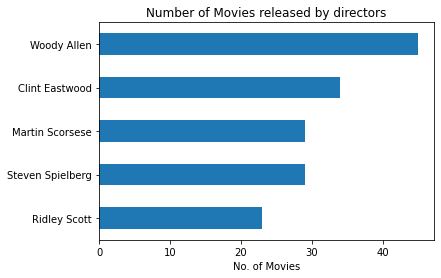

In [53]:
#this shows the director with the highest number of movies
df['director'].value_counts().head().plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Number of Movies released by directors')
plt.xlabel('No. of Movies')

Text(0, 0.5, 'profit')

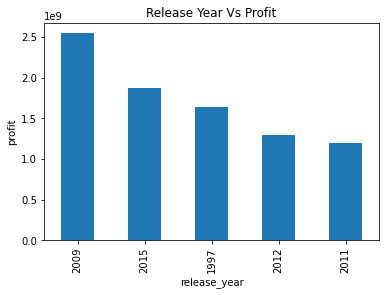

In [54]:
#calculating the profit and obtaining the movie with the highest profit
df['profit'] = df['revenue'] - df['budget']
df['profit'].head().max()
df.groupby(['release_year'])['profit'].max().sort_values(ascending = False).head().plot(kind='bar')
plt.title('Release Year Vs Profit')
plt.ylabel('profit')

Text(0, 0.5, 'Movie_title')

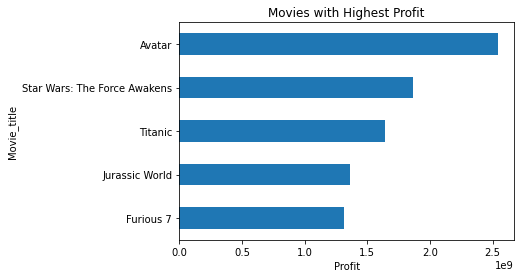

In [55]:
#Movie title with the highest profit
df.groupby(['original_title'])['profit'].max().sort_values(ascending = False).head().plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Movies with Highest Profit')
plt.xlabel('Profit')
plt.ylabel('Movie_title')

### Research Question 2 
- Does the popularity affects the revenue generated?
- Does the budget allocation affect the revenue generated?

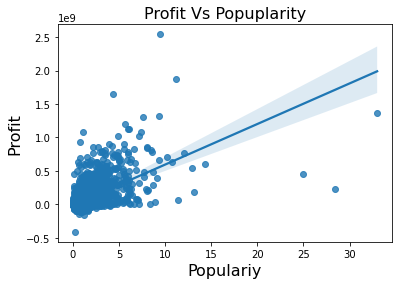

In [56]:
def relationship(dframe, x, y, title, xlabel, ylabel):
    sns.regplot(data=dframe, x=x, y=y)
    plt.title(title, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.xlabel(xlabel, fontsize=16)
    
relationship(df, 'popularity', 'profit', 'Profit Vs Popuplarity', 'Populariy', 'Profit')

In [57]:
maximum_revenue = df['revenue'].quantile(.95)

In [58]:
minimum_revenue = df['revenue'].quantile(.50)

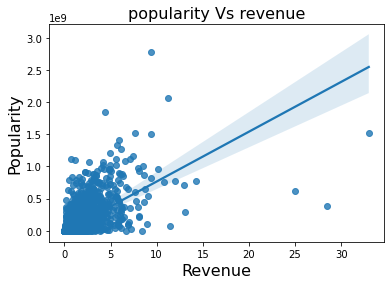

In [59]:
df.groupby('revenue')['popularity'].count().sort_values(ascending = False).head()
#relationship(df, 'revenue', 'budget', 'Revenue Vs Budget', 'Revenue', 'Budget')
relationship(df, 'popularity', 'revenue', 'popularity Vs revenue', 'Revenue', 'Popularity')

Text(0.5, 0, 'revenue')

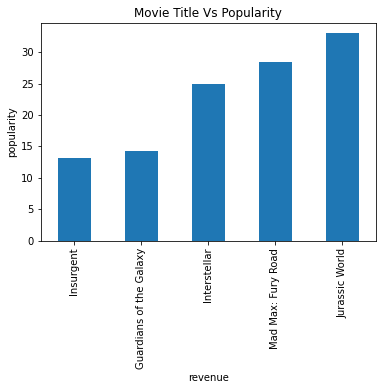

In [60]:
df.groupby(['original_title'])['popularity'].max().sort_values(ascending = False).head().plot(kind='bar')
plt.gca().invert_xaxis()
plt.title('Movie Title Vs Popularity')
plt.ylabel('popularity')
plt.xlabel('revenue')

Text(0, 0.5, 'revenue')

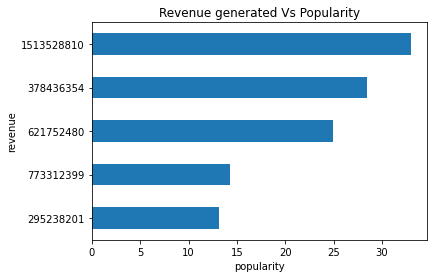

In [61]:
df.groupby(['revenue'])['popularity'].max().sort_values(ascending = False).head().plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Revenue generated Vs Popularity')
plt.xlabel('popularity')
plt.ylabel('revenue')

<AxesSubplot:>

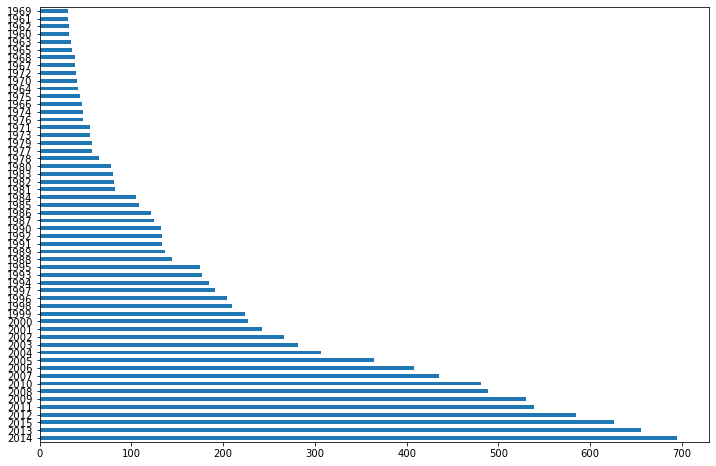

In [30]:
plt.figure(figsize=[12,8])
df['release_year'].value_counts().plot(kind='barh')

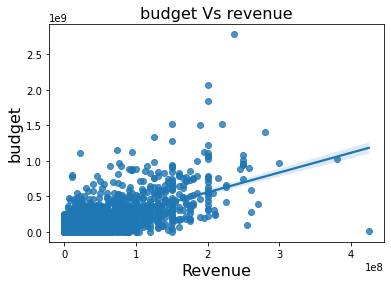

In [62]:
df.groupby('revenue')['budget'].count().sort_values(ascending = False).head()
relationship(df, 'budget', 'revenue', 'budget Vs revenue', 'Revenue', 'budget')

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

### ANSWERS

Firstly, Wooden Allen directed most movies and the highest profit was made from movies released in 2009
Secondly, it can be concluded from the barchats that the movie with the highest revenue is the most popular
Lastly, it can also be concluded that the movie with the highest budget generated the highest revenue

### LIMITATIONS

The limitation of this dataset is that it cannot give us information about movies released later than the year 2014